# **Analisis dan Prediksi Data Nasabah Bank**

## **I. Perkenalan**

**Identitas Diri**

* Nama : Anis Marsela

* Tanggal : 9 Juli 2025

---

**Identitas Proyek**

* Judul : Analisis dan Prediksi Data Nasabah Bank

* Dataset: UCI Bank Marketing Dataset – bank-full.csv

* Sumber Data: Paulo Cortez dan Sérgio Moro (2012), Universitas Minho & ISCTE-IUL

* Jumlah Data: 45.211 entri dan 17 atribut

---

**Problem Background**

Sebuah bank di Portugal menjalankan kampanye pemasaran lewat telepon untuk menawarkan produk deposito berjangka. Namun, tidak semua nasabah tertarik, sehingga banyak waktu dan tenaga terbuang sia-sia.

Dengan bantuan data historis dari kampanye sebelumnya, kita ingin memprediksi apakah seorang nasabah akan setuju membuka deposito atau tidak. Tujuannya adalah agar kampanye lebih tepat sasaran dan efisien.

---

**Gambaran Umum Dataset**

Dataset ini berisi data historis dari kampanye pemasaran langsung (via telepon) yang dilakukan oleh sebuah institusi perbankan di Portugal. Tujuannya adalah untuk mempromosikan produk deposito berjangka kepada nasabah. Kampanye ini bisa terdiri dari beberapa kontak dengan nasabah yang sama, dan hasil akhirnya adalah apakah nasabah bersedia membuka deposito berjangka atau tidak.

Setiap entri merepresentasikan satu kontak dengan nasabah dan mencakup informasi demografis, status keuangan, riwayat pinjaman, serta detail interaksi dalam kampanye pemasaran.

---

**Nama Kolom dan Penjelasanya**

1. age : Umur nasabah dalam tahun

2. job : Jenis pekerjaan nasabah (misalnya: admin., technician, blue-collar, dll.)

3. marital : Status pernikahan (single, married, divorced)

4. education : Tingkat pendidikan (primary, secondary, tertiary, unknown)

5. 	default : Apakah nasabah memiliki kredit macet? (yes/no)

6. balance : Saldo rata-rata tahunan dalam akun nasabah (dalam Euro)

7. housing : Apakah nasabah memiliki pinjaman rumah? (yes/no)

8. loan : Apakah nasabah memiliki pinjaman pribadi? (yes/no)

9. contact : Jenis kontak komunikasi terakhir (cellular, telephone, unknown)

10. day : Hari dalam bulan saat kontak terakhir dilakukan (1–31)

11. month : Bulan saat terakhir kali dihubungi (jan, feb, …, dec)

12. duration : Durasi panggilan terakhir (dalam detik)

13. campaign : Jumlah kontak yang dilakukan selama kampanye ini (termasuk kontak terakhir)

14. pdays : Jumlah hari sejak terakhir kali nasabah dihubungi dalam kampanye sebelumnya. Nilai -1 berarti belum pernah dihubungi sebelumnya

15. previous : Jumlah kontak sebelumnya sebelum kampanye ini

16. poutcome : 	Hasil dari kampanye pemasaran sebelumnya (success, failure, other, unknown)

17. y : Respons akhir: Apakah nasabah akhirnya berlangganan deposito berjangka? ("yes" atau "no")


---

**Tujuan Analisis (Objective)**

Tujuan utama dari proyek ini adalah:

1. Membersihkan dan mempersiapkan data untuk dianalisi.

2. Memahami pola dan tren dari karakteristik nasabah yang bersedia atau tidak bersedia berlangganan produk deposito.

3. Mengindentifikasi faktor-faktor penting yang mempengaruhi keputusan nasabah.

4. Membangun model klasifikasi yang dapat memprediksi apakah seorang nasabah akan menyetujui penawaran deposito berjangka (`y = yes` atau `no`).

4. Memberikan insight yang dapat membantu tim pemasan bank dalam menyusun strategi yang lebih efektif ke depanya.

## **II. Import Libraries**

In [2]:
# Standard Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature Engineering 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer

# Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation Metrics 
from sklearn.metrics import classification_report, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Imbalanced Data Handling 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Utilities 
import joblib

## **III. Data Loading**

### **Membaca Dataset**

Dataset ini berasal dari kampanye pemasaran produk deposito berjangkan oleh sebuah bank di Portugas. Data yang digunakan berformat CSV dengan delimiter ; sehingga perlu dibaca dengan argumen tambahan.

In [3]:
# load dataset with delimenter ";"
df_bank = pd.read_csv("bank-full.csv", sep=";", quotechar='"')

# Tampilan 5 baris pertama
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **Ukuran Dataset**

Dataset memiliki:

In [4]:
# Cek ukuran dataset
print("Jumlah baris:", df_bank.shape[0])
print("Jumlah kolom:", df_bank.shape[1])

Jumlah baris: 45211
Jumlah kolom: 17


### **Informasi Tipe Data dan Missing Value**

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Output menunjukkan bahwa semua kolom memiliki data bertipe `object` atau `int`, dan tidak ada nilai yang hilang (missing value)

### **Mengecek Duplikat Data**

Duplikat dapat memengaruhi hasil analisis, terutama pada perhitungan statistik

In [6]:
df_bank.duplicated().sum()

0

Tidak ada data duplikat

### **Cek Statistik Data**

In [7]:
df_bank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


* Banyak kolom numerik seperti `balace`, `duration`, `campaign`, `pydays`,dan  `previous` memiliki distribusi skewed dan terdapat outlier ekstrem.
* Target (`y`) sangant imbalanced dengan mayoritas kelas "no". Terlihat dari nilai yang paling sering muncul (top): "no" serta frequensinya sekitar 39,922 diperlukan penanganan khusus seperti oversampling.

## **IV. Exploratory Data Analysis (EDA)**

EDA bertujuan untuk memahami karakterikstik data, melihat pola, dan menemukan potensi masalah sebelum melakukan modeling. Berikut beberapa eksplorasi awal yang dilakukan:

### **Distribusi Target Variabel (`y`)**

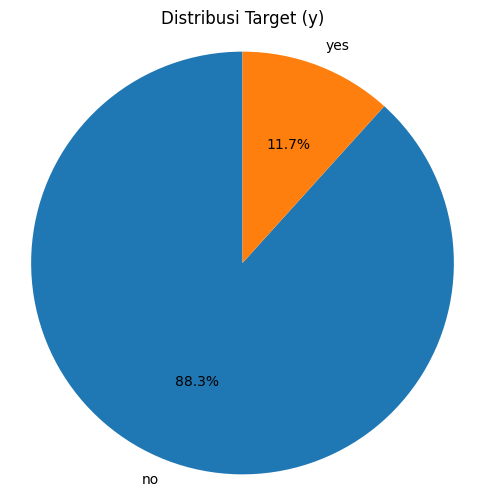

In [32]:
# sns.countplot(x='y', data=df_bank)
# plt.title('Distribusi Target (y)')
# plt.xlabel('Langganan')
# plt.ylabel('Jumlah')
# plt.show()


# Hitung jumlah masing-masing kelas
target_counts = df_bank['y'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Target (y)')
plt.axis('equal')  # Biar pie-nya bulat
plt.show()


* Jumlah pelanggan yang berlangganan (yes) jauh lebih sedikit dibandingkan yang tidak (no).

* Ini menunjukkan bahwa data tidak seimbang (imbalanced).

* Model perlu perhatian khusus, seperti teknik penyeimbangan data.

### **Distribusi Umur (`age`)**

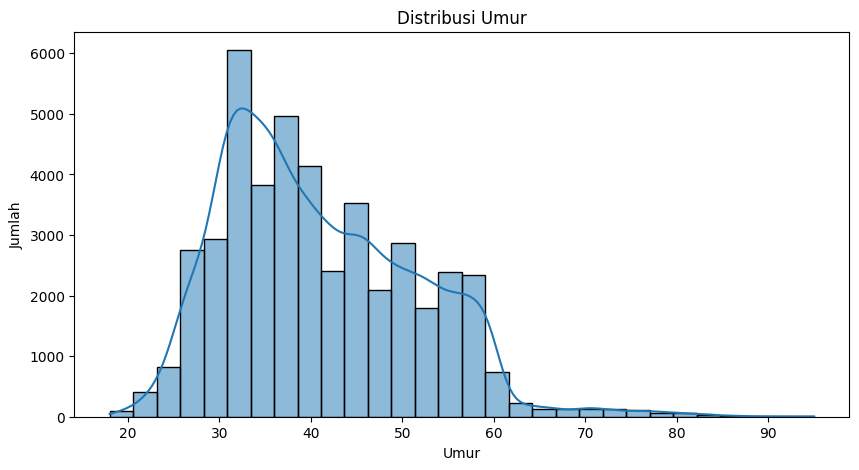

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_bank['age'], bins=30, kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

* Sebagian besar nasabah berada pada rentang umur hingga 30 hingga 40 tahun.

* Distribusi umur menunjukkan pola yang miring ke kanan (right-skewed), artinya lebih banyak nasabah berusia muda hingga paruh baya dibandingkan yang berusia lanjut.

* Terdapat putlier berupa nasabah dengan usia di atas 90 tahun, yang cukup jarang

### **Status Perumahan (`housing`)**

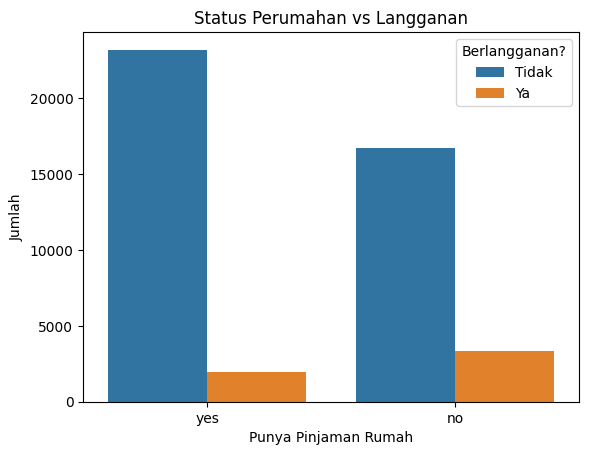

In [12]:
sns.countplot(x='housing', hue='y', data=df_bank)
plt.title('Status Perumahan vs Langganan')
plt.xlabel('Punya Pinjaman Rumah')
plt.ylabel('Jumlah')
plt.legend(title='Berlangganan?', labels=['Tidak', 'Ya'])
plt.show()

* Nasabah tanpa pinjaman rumah cenderung lebih bersedia berlangganan deposito dibanding yang masih memiliki pinjaman rumah.

* Kemungkinan memiliki kondisi finansial lebih stabil dan siap untuk berinvestasi atau menyimpan uang dalam deposito.

* Nasabah dengan pinjaman rumah mungkin lebih berhati-hati dalam mengelola keuangan, sehingga kurang tertarik menaruh dana tambahan dalam bentuk deposito.

### **Jenis Pekerjaan (`job`)**

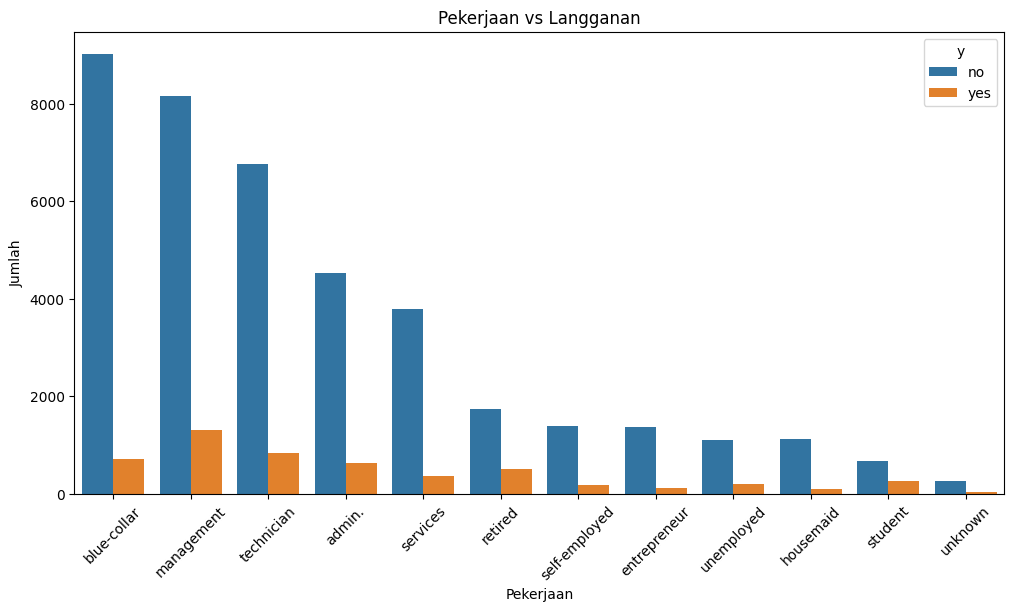

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='y', data=df_bank, order=df_bank['job'].value_counts().index)
plt.title('Pekerjaan vs Langganan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

* Pekerjaan dengan jumlah nasabah terbanyak: blue-collar, management, dan technician.

* Pelanggan yang berstatus “student” memiliki proporsi “yes” tertinggi meski jumlahnya sedikit.

* Sebaliknya, pekerjaan seperti blue-collar dan housemaid cenderung memiliki tingkat langganan rendah.

* Ini menunjukkan bahwa jenis pekerjaan sangat mempengaruhi kemungkinan seseorang untuk berlangganan, mungkin terkait dengan penghasilan atau preferensi produk finansial.

### **Bulan Kontak (`month`)**

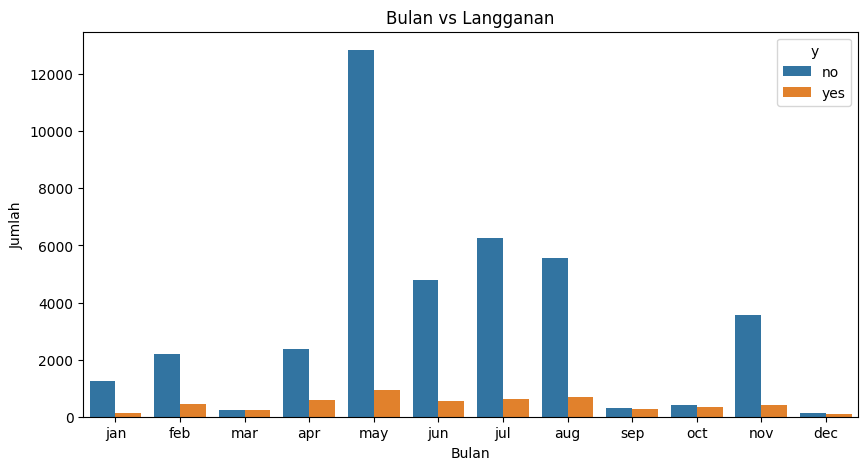

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', hue='y', data=df_bank, order=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Bulan vs Langganan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

* Aktivitas kampanye tertinggi terjadi pada bulan Mei, Juni, dan Juli

* Namun, rasio keberhasilan (jumlah ya dibanding total kontak) terlihat lebih tinggi di bulan Maret, Desember, dan September (meskipun jumlahnya kecil)

* Ini menunjukkan bahwa kampanye besar-besaran belum tentu efektif, waktu pelaksanaan kampanye juga sangat penting

### **Status Pinjaman Pribadi (`loan`)**

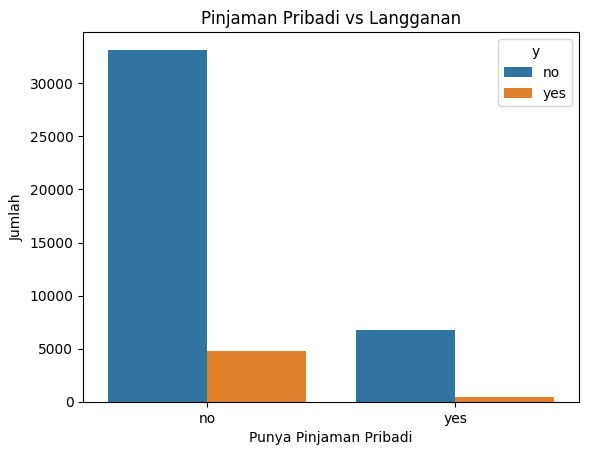

In [15]:
sns.countplot(x='loan', hue='y', data=df_bank)
plt.title('Pinjaman Pribadi vs Langganan')
plt.xlabel('Punya Pinjaman Pribadi')
plt.ylabel('Jumlah')
plt.show()

* Nasabah yang tidak memiliki pinjaman pribadi cenderung lebih banyak yang berlangganan.

* Kemungkinan: Klien tanpa beban pinjaman merasa lebih nyaman untuk menyisihkan dana dalam deposito berjangka dibandingkan nasabah yang punya pinjaman pribadi

### **Interaksi antara duration dan y**

Menampilkan distribusi duration hanya untuk data yang y = yes, karena ini sangat berpengaruh.

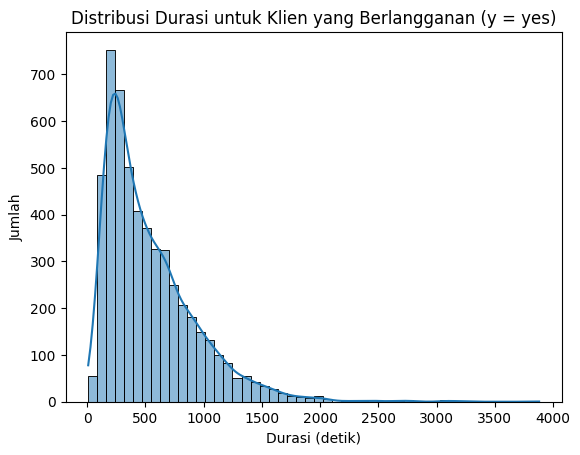

In [16]:
sns.histplot(df_bank[df_bank['y'] == 'yes']['duration'], bins=50, kde=True)
plt.title('Distribusi Durasi untuk Klien yang Berlangganan (y = yes)')
plt.xlabel('Durasi (detik)')
plt.ylabel('Jumlah')
plt.show()


* Sebagian besar klien yang berlangganan memiliki durasi percakapan pendek (sekitar 100–400 detik)

* Panggilan yang menghasilkan konversi (y=yes) cenderung berdurasi lama, menunjukkan bahwa klien yang diberi lebih banyak waktu untuk komunikasi lebih mungkin untuk berlangganan

* Artinya: Durasi percakapan adalah indikator penting dalam keberhasilan kampanye

### **Korelasi antar kolom numerik**

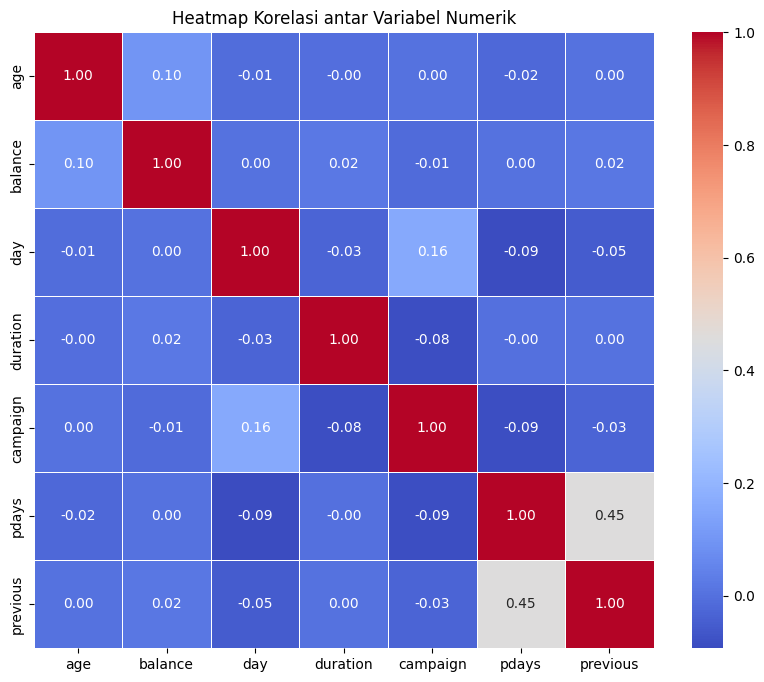

In [17]:
corr = df_bank.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.show()


* Tidak ada korelasi kuat antar variabel numerik (sebagian besar < 0.2)

* duration tidak berkorelasi kuat dengan variabel lain, tapi berdampak besar terhadap hasil kampanye (target y), meski tidak bisa digunakan untuk prediksi awal (karena hanya diketahui setelah panggilan dilakukan)

* Korelasi tertinggi adalah antara pdays (hari sejak terakhir dihubungi) dan previous (jumlah kontak sebelumnya), yaitu 0.45 ini wajar karena keduanya mencerminkan riwayat interaksi

* Umumnya, semua korelasi antar variabel rendah, menunjukkan minimnya multikolinearitas dan bahwa masing-masing variabel membawa informasi yang relatif unik

## **V. Feature Engineering**

### **Cek Cardinality (Fitur Kategori dengan Banyak Nilai Unik)**

In [18]:
# ambil kolom kategorikal
cat_columns = df_bank.select_dtypes(include='object').columns.tolist()
cardinality_info = []

for i, col in enumerate(cat_columns, 1):
    unique_vals = df_bank[col].unique()
    cardinality_info.append({
        "No": i,
        "Kolom": col,
        "Jumlah Unik": len(unique_vals),
        "Nilai Unik": unique_vals
    })

pd.DataFrame(cardinality_info)

,No,Kolom,Jumlah Unik,Nilai Unik
0,1,job,12,"[management, technician, entrepreneur, blue-co..."
1,2,marital,3,"[married, single, divorced]"
2,3,education,4,"[tertiary, secondary, unknown, primary]"
3,4,default,2,"[no, yes]"
4,5,housing,2,"[yes, no]"
5,6,loan,2,"[no, yes]"
6,7,contact,3,"[unknown, cellular, telephone]"
7,8,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
8,9,poutcome,4,"[unknown, failure, other, success]"
9,10,y,2,"[no, yes]"


* Tidak ada kolom dengan high cardinality (>50 nilai unik).

* Semua kolom kategorikal dapat diolah dengan One-Hot Encoding untuk kolom dengan <10 kategori

### **Split Feature dan Target**

In [19]:
X = df_bank.drop(columns='y')
y = df_bank['y']

### **Train-Test Split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### **Cek Skewness dan Distribusi Fitur Numerik**

In [21]:
skew_info = []
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    skew_val = X_train[col].skew()
    distrib = 'normal' if abs(skew_val) < 0.5 else 'skewed'
    skew_info.append({
        "Kolom": col,
        "Skewness": skew_val,
        "Distribusi": distrib
    })

pd.DataFrame(skew_info)

,Kolom,Skewness,Distribusi
0,age,0.693738,skewed
1,balance,8.340204,skewed
2,day,0.093389,normal
3,duration,3.210882,skewed
4,campaign,4.941861,skewed
5,pdays,2.616298,skewed
6,previous,45.034399,skewed


### **Cek Outlier Berdasarkan IQR**

In [22]:
outlier_info = []

for i, col in enumerate(num_cols, 1):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    percentage = len(outliers) / len(X_train) * 100

    outlier_info.append({
        "No": i,
        "Kolom": col,
        "Lower_Boundary": lower,
        "Upper_Boundary": upper,
        "Persentase Outlier": round(percentage, 2)
    })

pd.DataFrame(outlier_info)

,No,Kolom,Lower_Boundary,Upper_Boundary,Persentase Outlier
0,1,age,10.500,70.500,1.09
1,2,balance,-1960.375,3464.625,10.42
2,3,day,-11.500,40.500,0.00
3,4,duration,-219.500,640.500,7.28
4,5,campaign,-2.000,6.000,6.82
5,6,pdays,-1.000,-1.000,18.20
6,7,previous,0.000,0.000,18.20


* Beberapa kolom perlu capping seperti kolom age, balance, duration, campaign karena distribusi yang tidak merata dan oulier ekstrem
* kolom day distribusinya oke dan gak ada nilai ekstrem. Jadi gak perlu penangnan outlier
* teruntuk kolom pdays dan previous ada nila -1 bukan error, tapi memang menunjukkan nasabah belum pernah dihubungi sebelumya. karena itu, tidak dianggap outlier dan dibiarkan apa adanya

### **Membuat Pipeline**

Pipeline ini dibuat untuk menyiapkan data sebelum pelatihan model, dibagi fitur jadi dua: numerik dan kategorikal, lalu kita lakukan:

* Imputer: mengisi data kosong (numerik pakai median, kategorikal pakai nilai terbanyak).

* Winsorizer: membatasi nilai ekstrim (outlier) di data numerik.

* Scaler: menyesuaikan skala data numerik.

* Encoder: mengubah data kategori jadi angka.

* ColumnTransformer: menggabungkan semua proses di atas dalam satu langkah.

Dengan pipeline ini, proses preprocessing jadi lebih rapi, otomatis, dan konsisten.

In [23]:
# Deteksi kolom numerik dan kategorikal dari X_train
num_cols = X_train.select_dtypes(include='number').columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# Pilih hanya kolom yang perlu di-winsorize
cols_to_winsorize = ['age', 'balance', 'duration', 'campaign']

# Pipeline untuk fitur numerik (khusus untuk kolom outlier)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('winsor', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan semua pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, cols_to_winsorize),
    ('cat', categorical_pipeline, cat_cols)
])

## **VI. Model Definition**

Pada tahap ini, kita akan mendefinisikan berbagai algoritma machine learning untuk melakukan prediksi terhadap variabel target (y)

### **Model K-Nearest Neighbors (KNN)**

KNN bekerja dengan cara mencari sejumlah tetangga terdekat (dalam hal ini `n_neighbors=5`) dari data yang akan diprediksi. Parameter `weights='distance'` artinya tetangga yang lebih dekat punya pengaruh lebih besar. KNN cocok untuk data dengan skala fitur yang seragam, sehingga penting dilakukan scaling.

In [24]:
pipeline_knn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

### **Model Support Vector Machine (SVM)**

SVM adalah algoritma yang mencari batas terbaik (hyperplane) yang memisahkan dua kelas. `kernel='rbf'` digunakan untuk menangani data non-linear. `C=1` adalah parameter regulasi, mengontrol seberapa banyak kesalahan yang ditoleransi.

In [25]:
pipeline_svm = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(kernel='rbf', C=1, probability=True, class_weight='balanced'))
])

### **Model Decision Tree**

Decision Tree bekerja dengan membuat pohon keputusan dari fitur data. `max_depth=5` membatasi kedalaman pohon agar tidak terlalu kompleks (overfitting). `criterion='gini'` digunakan untuk mengukur seberapa murni node dalam pohon.

In [26]:
pipeline_dt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42))
])

### **Model Random Forest**

Random Forest adalah kumpulan banyak Decision Tree yang digabung untuk hasil yang lebih akurat. Model ini cocok untuk menangani overfitting dan meningkatkan akurasi model. `n_estimators=100` artinya menggunakan 100 pohon. `max_depth=10` mengontrol kompleksitas tiap pohon.

In [27]:
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'))
])

### **Model Gradient Boosting (Boosting)**

Boosting menggabungkan beberapa model lemah secara bertahap untuk membentuk model yang kuat. Model ini biasanya memiliki perfoma yang sangat baik, terutama pada data kompleks dan tidak linear, , tapi butuh waktu komputasi lebih lama. `n_estimators=100` jumlah model kecil (tree) yang digabungkan. `learning_rate=0.1` mengontrol seberapa besar kontribusi tiap model baru.

In [28]:
pipeline_gb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

## **VII. Model Training**

 Melatih semua pipeline model

In [29]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', KNeighborsClassifier(weights='distance'))])

In [30]:
pipeline_svm.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [ ]:
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

## **VIII. Model Evaluation**

### **KNN**

In [ ]:
# Evaluasi KNN
y_pred_knn = pipeline_knn.predict(X_test)
print(" K-Nearest Neighbors ")
print(classification_report(y_test, y_pred_knn, target_names=['no', 'yes']))


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      7985
         yes       0.55      0.34      0.42      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



Model sangat baik dalam mengenali kelas mayoritas ("no"), tapi lemah dalam mengenali kelas minoritas ("yes") dikareakan data imbalance, model kurang baik dalam menangkap pelanggan yang benar berlangganan. maka kita coba lakukan cross validation dengan smote untuk menyeyeimbangkan jumlah data di setiap fold pelatihan

In [ ]:
# Bangun pipeline dengan SMOTE di dalamnya
pipeline_knn = ImbPipeline(steps=[
    ('preprocessing', preprocessor),  
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Gunakan Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation dengan f1-macro agar tetap mengukur semua kelas meski imbalance
f1_scores = cross_val_score(
    pipeline_knn,
    X_train,
    y_train,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)

# Tampilkan hasil
print("=== KNN Cross-Validation (5-Fold, SMOTE + Stratified) ===")
print("F1 Scores (tiap fold):", f1_scores)
print("Mean F1 Score         :", f1_scores.mean())
print("Std Dev F1 Score      :", f1_scores.std())
print("Range F1 Score        :", f"{f1_scores.mean() - f1_scores.std():.4f} - {f1_scores.mean() + f1_scores.std():.4f}")


=== KNN Cross-Validation (5-Fold, SMOTE + Stratified) ===
F1 Scores (tiap fold): [0.68179228 0.69773646 0.7032655  0.69953864 0.69036026]
Mean F1 Score         : 0.6945386292944045
Std Dev F1 Score      : 0.007632991327512001
Range F1 Score        : 0.6869 - 0.7022



=== Evaluasi KNN pada Test Set ===
F1 Score Test Set     : 0.7017364033743241
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.84      0.90      7985
         yes       0.38      0.76      0.51      1058

    accuracy                           0.83      9043
   macro avg       0.67      0.80      0.70      9043
weighted avg       0.90      0.83      0.85      9043



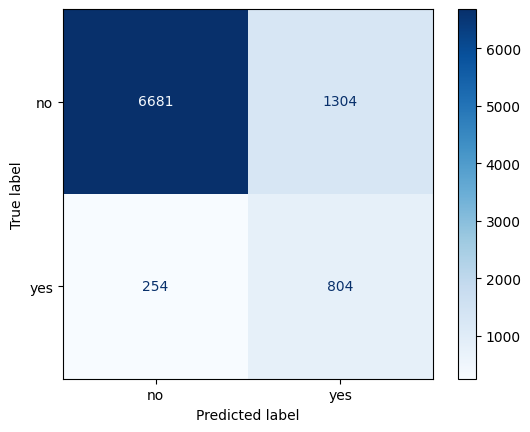

In [ ]:
# Fit model dulu
pipeline_knn.fit(X_train, y_train)

# Prediksi
y_pred = pipeline_knn.predict(X_test)

# Evaluasi
print("\n=== Evaluasi KNN pada Test Set  ")
print("F1 Score Test Set     :", f1_score(y_test, y_pred, average='macro'))  # pakai average='macro' karena imbalanced
print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_test, y_test, cmap='Blues')


Setelah dilakukan Cross Validation dan SMOTE 

* f1 score naik jadi 0.69 artinya model mulai mengenali dua kelas
* Di test set, F1 naik dratis jadi 0.70
* Confusion matrix menunjukkan model berhasil mengenail804 pelanggan dengan benar, walaupun masih salah predikit 254
* SMOTE membantu model KNN menjadi mengenali kelas minoris "yes"
* Dari hasil di atas, model ini punya **kelebihan** untuk mengenali pelanggan yang benar-benar berlangganan. terlihat dari peningkatan f1-score pada kelas minoritas ("yes") baik di hasil cross-validation maupun test set
* Namun, **kekurangannya**, model ini masih menghasilkan precision rendah pada kelas "yes" (0.38), artinya cukup banyak prediksi “ya” yang sebenarnya salah.

### **SVM**

In [ ]:
# Evaluasi SVM
y_pred_svm = pipeline_svm.predict(X_test)
print("=== Support Vector Machine ===")
print(classification_report(y_test, y_pred_svm, target_names=['no', 'yes']))


=== Support Vector Machine ===
              precision    recall  f1-score   support

          no       0.98      0.83      0.90      7985
         yes       0.41      0.86      0.55      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.85      0.73      9043
weighted avg       0.91      0.84      0.86      9043



F1 pada kelas "no" sangan tinggi (0.90)  hampir semua non-pelanggan dikenali dengan baik. Namun, F1 pada kelas yes  hampir semua non-pelanggan dikenali dengan baik.  walaupun recall tinggi (0.86), precision rendah (0.41) → model sering "mengira" orang akan berlangganan padahal tidak.

In [ ]:
# Buat pipeline untuk SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessing', preprocessor),  # preprocessor harus sudah kamu definisikan
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])

cv_f1_svm = cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='f1_macro')

print("\n=== SVM Cross-Validation (5-Fold) ===")
print("F1 Scores (tiap fold):", cv_f1_svm)
print("Mean F1 Score         :", cv_f1_svm.mean())
print("Std Dev F1 Score      :", cv_f1_svm.std())


=== SVM Cross-Validation (5-Fold) ===
F1 Scores (tiap fold): [0.66863321 0.64577305 0.67113767 0.66426971 0.66657181]
Mean F1 Score         : 0.6632770895911804
Std Dev F1 Score      : 0.009041114814384488



=== Evaluasi SVM pada Test Set ===
F1 Score Test Set     : 0.677960968067003
Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.98      0.95      7985
         yes       0.71      0.29      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.81      0.64      0.68      9043
weighted avg       0.89      0.90      0.88      9043



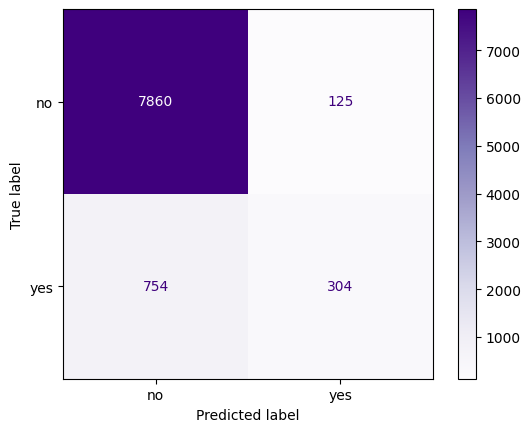

In [ ]:
# Fit model ke data latih
pipeline_svm.fit(X_train, y_train)

# Prediksi di test set
y_pred_svm = pipeline_svm.predict(X_test)

# Evaluasi performa
print("\n=== Evaluasi SVM pada Test Set ===")
print("F1 Score Test Set     :", f1_score(y_test, y_pred_svm, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(pipeline_svm, X_test, y_test, cmap='Purples')


* F1 Score rata-rata stabil di 0.66 sedikit di bawah KNN.Di test set, performa turun F1 score jadi 0.67.
* Pada Confusion Matrix banyak false positive (754) artinya pelanggan yang sebenarnya tidak berlangganan tapi diprediksi akan berlangganan.
* Model cenderung overpredict ke kelas "yes", sehingga banyak prediksi berlangganan padahal sebenarnya tidak.
* **Kelebihanya** model SVM justru lebih unggul dalam mengenali pelanggan yang tidak akan berlangganan (kelas "no")
* Sayangnya, **kekuranganya** adalah performa SVM dalam menangkap pelanggan yang benar-benar ingin berlangganan masih kurang optimal, banyak pelanggan "yes" yang tidak berhasil dikenali oleh model

### **Decision Tree**

In [ ]:
# Evaluasi Decision Tree
y_pred_dt = pipeline_dt.predict(X_test)
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt, target_names=['no', 'yes']))


=== Decision Tree ===
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      7985
         yes       0.59      0.40      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [ ]:
# Pipeline Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

cv_f1_dt = cross_val_score(pipeline_dt, X_train, y_train, cv=5, scoring='f1_macro')

print("\n=== Decision Tree Cross-Validation (5-Fold) ===")
print("F1 Scores (tiap fold):", cv_f1_dt)
print("Mean F1 Score         :", cv_f1_dt.mean())
print("Std Dev F1 Score      :", cv_f1_dt.std())


=== Decision Tree Cross-Validation (5-Fold) ===
F1 Scores (tiap fold): [0.69020819 0.68461643 0.68813725 0.67721826 0.69170925]
Mean F1 Score         : 0.6863778740301878
Std Dev F1 Score      : 0.005161228989519856



=== Evaluasi Decision Tree pada Test Set ===
F1 Score Test Set     : 0.6891306178001656
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.91      0.92      7985
         yes       0.42      0.51      0.46      1058

    accuracy                           0.86      9043
   macro avg       0.68      0.71      0.69      9043
weighted avg       0.87      0.86      0.87      9043



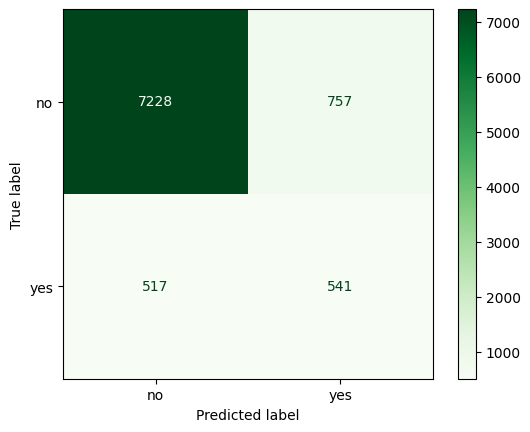

In [ ]:
# Fit model ke data latih
pipeline_dt.fit(X_train, y_train)

# Prediksi di test set
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluasi performa
print("\n=== Evaluasi Decision Tree pada Test Set ===")
print("F1 Score Test Set     :", f1_score(y_test, y_pred_dt, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(pipeline_dt, X_test, y_test, cmap='Greens')

* setelah dilakukan SMOTE dan cross-validation mengalami peningkatan performa. F1 score meningkat menjadi 0.69 di test set, menandakan model mulai seimbang dalam mengenali dua kelas.
* Namun, precision-nya untuk kelas “yes” masih rendah (0.42), artinya masih cukup banyak false positive (model memprediksi "ya", padahal "tidak")
* Pada Confussion Metrix 541 pelanggan yang benar-benar ingin berlangganan berhasil dikenali dengan benar. Tapi masih ada 517 pelanggan “yes” yang salah diklasifikasikan sebagai “no”
* Model ini lumayan **bagus** dan sudah mengenali setengah dari pelanggan “yes”. Masih cukup banyak yang **salah** prediksi, tapi lebih baik dibanding SVM.

### **Random Forest**

In [ ]:
# Evaluasi Random Forest
y_pred_rf = pipeline_rf.predict(X_test)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['no', 'yes']))


=== Random Forest ===
              precision    recall  f1-score   support

          no       0.98      0.83      0.90      7985
         yes       0.40      0.85      0.54      1058

    accuracy                           0.83      9043
   macro avg       0.69      0.84      0.72      9043
weighted avg       0.91      0.83      0.86      9043



In [ ]:
# Pipeline Random Forest dengan SMOTE
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Cross-validation menggunakan F1 Macro (karena data imbalance)
cv_f1_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='f1_macro')

# Output hasil evaluasi
print("\n=== Random Forest Cross-Validation (5-Fold) ===")
print("F1 Scores (tiap fold):", cv_f1_rf)
print("Mean F1 Score         :", cv_f1_rf.mean())
print("Std Dev F1 Score      :", cv_f1_rf.std())
print("Range F1 Score        :", 
      round(cv_f1_rf.mean() - cv_f1_rf.std(), 4), '-', 
      round(cv_f1_rf.mean() + cv_f1_rf.std(), 4))


=== Random Forest Cross-Validation (5-Fold) ===
F1 Scores (tiap fold): [0.74499946 0.74169113 0.74761022 0.72482168 0.74288413]
Mean F1 Score         : 0.7404013230855488
Std Dev F1 Score      : 0.008045674066043158
Range F1 Score        : 0.7324 - 0.7484



=== Evaluasi Decision Tree pada Test Set ===
F1 Score Test Set     : 0.7490636432217207
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.94      0.94      7985
         yes       0.56      0.55      0.56      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.75      0.75      9043
weighted avg       0.90      0.90      0.90      9043



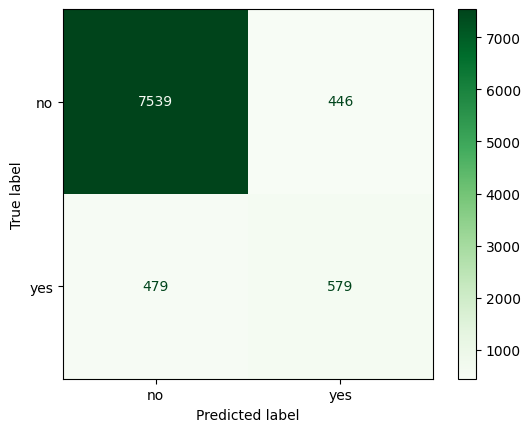

In [ ]:
# Fit model ke data latih
pipeline_rf.fit(X_train, y_train)

# Prediksi di test set
y_pred_dt = pipeline_rf.predict(X_test)

# Evaluasi performa
print("\n=== Evaluasi Decision Tree pada Test Set ===")
print("F1 Score Test Set     :", f1_score(y_test, y_pred_dt, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test, cmap='Greens')

* F1 score pada test set mencapai 0.75, dengan precision dan recall yang cukup seimbang untuk kelas “yes”.
* Dari 1058 pelanggan yang benar-benar “yes”, model berhasil mengenali 579 orang
* Jumlah salah klasifikasi juga lebih rendah dibanding Decision Tree (FN = 479).
* Model ini yang paling bagus sejauh ini dalam mengenali dua kelas, terutama untuk "yes". kemudia, Prediksinya stabil dan kesalahan (baik false positive maupun false negative) cukup rendah.

### **Gradient Boosting**

In [ ]:
# Evaluasi Gradient Boosting
y_pred_gb = pipeline_gb.predict(X_test)
print("=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb, target_names=['no', 'yes']))


=== Gradient Boosting ===
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.64      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
# Pipeline Gradient Boosting
pipeline_gb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Cross-validation dengan f1_macro karena data imbalance
cv_f1_gb = cross_val_score(pipeline_gb, X_train, y_train, cv=5, scoring='f1_macro')

# Output hasil evaluasi
print("\n=== Gradient Boosting Cross-Validation (5-Fold) ===")
print("F1 Scores (tiap fold):", cv_f1_gb)
print("Mean F1 Score         :", cv_f1_gb.mean())
print("Std Dev F1 Score      :", cv_f1_gb.std())
print("Range F1 Score        :", 
      round(cv_f1_gb.mean() - cv_f1_gb.std(), 4), '-', 
      round(cv_f1_gb.mean() + cv_f1_gb.std(), 4))


=== Gradient Boosting Cross-Validation (5-Fold) ===
F1 Scores (tiap fold): [0.75519197 0.74686959 0.75593089 0.74676032 0.75789901]
Mean F1 Score         : 0.7525303564776648
Std Dev F1 Score      : 0.004749903351573379
Range F1 Score        : 0.7478 - 0.7573



=== Evaluasi Decision Tree pada Test Set ===
F1 Score Test Set     : 0.756448592595935
Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.89      0.93      7985
         yes       0.47      0.77      0.59      1058

    accuracy                           0.87      9043
   macro avg       0.72      0.83      0.76      9043
weighted avg       0.91      0.87      0.89      9043



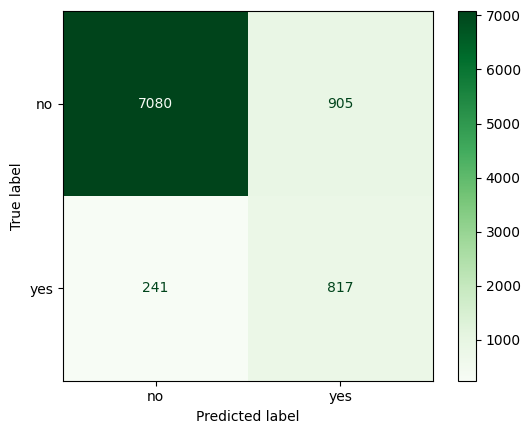

In [ ]:
# Fit model ke data latih
pipeline_gb.fit(X_train, y_train)

# Prediksi di test set
y_pred_dt = pipeline_gb.predict(X_test)

# Evaluasi performa
print("\n=== Evaluasi Decision Tree pada Test Set ===")
print("F1 Score Test Set     :", f1_score(y_test, y_pred_dt, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(pipeline_gb, X_test, y_test, cmap='Greens')

* pada F1 Score (Test Set): 0.756, tertinggi di antara semua model sejauh ini artinya model cukup seimbang dalam mengenali dan memprediksi pelanggan yang akan berlangganan.
* 817 pelanggan “yes” berhasil diprediksi dengan benar. Ini adalah true positive tertinggi di antara semua model yang sudah dicoba
* Hanya 241 pelanggan “yes” yang meleset (false negative), artinya model cukup bagus dalam mengenali pelanggan yang akan berlangganan.
* model ini sudah bagus dalam mengenail pelangga yang "yes" (recall tinggi), akan tetapi masih banyak false positive  (905 pelanggan diprediksi "yes" padahal tidak).

### **Kesimpulan dan Pemilihan Model Terbaik**

Dalam proyek ini, kita membandingkan lima model machine learning: **K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest**, dan **Gradient Boosting**, untuk memprediksi apakah seorang nasabah akan melakukan **deposit** atau tidak. Karena data tidak seimbang (lebih banyak nasabah tidak melakukan deposit), fokus utama evaluasi adalah pada kemampuan model dalam mengenali nasabah yang benar-benar akan melakukan deposit (kelas **“yes”**), tanpa mengabaikan akurasi secara keseluruhan.

1. **KNN** berhasil memberikan F1-score sebesar **0.70** untuk kelas “yes” pada test set. Recall tinggi (**0.76**) menunjukkan model ini cukup baik dalam menangkap nasabah yang akan deposit, tetapi precision rendah (**0.38**) menandakan banyak prediksi “yes” yang salah. Ini bisa berisiko dari sisi biaya, karena bank bisa salah sasaran dalam pendekatan ke nasabah.

2. **SVM** memiliki F1-score hanya **0.41** untuk kelas “yes”, dan recall rendah (**0.29**). Meskipun akurasi keseluruhan tinggi, model ini cenderung mengabaikan kelas minoritas. Artinya, banyak nasabah potensial yang melakukan deposit justru tidak terdeteksi—kurang ideal untuk tujuan kampanye pemasaran.

3. **Decision Tree** menunjukkan hasil cukup baik dengan F1-score **0.69** dan recall **0.51**. Meskipun hasilnya sedang, kelebihan dari model ini adalah interpretabilitas yang tinggi—bank dapat dengan mudah memahami aturan yang digunakan untuk klasifikasi.

4. **Random Forest** memberikan F1-score **0.75**, dengan keseimbangan yang lebih baik antara recall (**0.55**) dan precision (**0.56**). Model ini kuat dan stabil, serta mampu mengurangi overfitting. Cukup cocok jika bank ingin pendekatan yang andal dan fleksibel.

5. **Gradient Boosting** tampil sebagai model dengan performa terbaik. F1-score untuk kelas “yes” mencapai **0.76**, recall tertinggi (**0.77**), dan precision cukup baik (**0.47**). Model ini secara konsisten berhasil mengenali nasabah yang benar-benar akan melakukan deposit, menjadikannya sangat berguna untuk membantu pengambilan keputusan dalam kampanye pemasaran atau penawaran produk.



**Model Terbaik**

Berdasarkan hasil evaluasi, **Gradient Boosting dipilih sebagai model terbaik**. Model ini memiliki kombinasi recall dan precision yang optimal untuk mendeteksi nasabah yang akan melakukan **deposit**, serta performa yang stabil selama cross-validation. Dengan menggunakan model ini, bank bisa secara lebih efektif dan efisien menargetkan nasabah yang benar-benar berpotensi untuk mendepositkan dana mereka.



## **XI. Hyperparameter Tuning**

Hyperparameter tuning adalah proses untuk menemukan kombinasi parameter terbaik pada sebuah model machine learning agar performanya maksimal. Tujuannya adalah mengoptimalkan performa model, terutama dalam konteks dataset yang tidak seimbang seperti kasus ini.

**Tujuan Proyek**

Dalam kasus ini, kita ingin memprediksi apakah seorang nasabah akan berlangganan deposito berjangka (y = 'yes'). Karena jumlah nasabah yang benar-benar tertarik (yes) jauh lebih sedikit dibanding yang tidak (no), maka kita menghadapi masalah klasifikasi tidak seimbang. Recall mengukur seberapa banyak dari nasabah yang sebenarnya akan melakukan deposit berhasil terdeteksi oleh model. Dengan kata lain, semakin tinggi recall, semakin sedikit nasabah potensial yang “terlewatkan” oleh model. Jika model salah memprediksi nasabah “yes” menjadi “no”, perusahaan kehilangan kesempatan penjualan. Biaya kehilangan peluang ini bisa lebih tinggi dibanding biaya promosi ke nasabah yang ternyata tidak tertarik (false positive).

**Metode yang Digunakan**

Proses tuning dilakukan menggunakan GridSearchCV pada model Gradient Boosting yang sudah dipadukan dengan SMOTE dan preprocessing pipeline. GridSearch ini mengeksplorasi kombinasi hyperparameter seperti:

* n_estimators: Jumlah pohon dalam ensemble

* learning_rate: Kecepatan pembelajaran

* max_depth: Kedalaman maksimum tiap pohon

* subsample: Proporsi data yang digunakan untuk masing-masing pohon

In [ ]:
# Pipeline Gradient Boosting dengan SMOTE
gb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('resample', SMOTE(random_state=42)), 
    ('model', GradientBoostingClassifier(random_state=42))  
])

# Parameter grid untuk tuning hyperparameter
param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__subsample': [0.8, 1.0]
}

# GridSearchCV untuk pencarian parameter terbaik 
grid_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Training model dengan grid search
grid_gb.fit(X_train, y_train)

# Hasil parameter terbaik 
print("Best GB Parameters:", grid_gb.best_params_)

#  Prediksi label dan laporan klasifikasi 
y_pred_gb = grid_gb.predict(X_test)
print("=== Classification Report: Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))

# Prediksi probabilitas untuk ROC AUC 
y_proba_gb = grid_gb.predict_proba(X_test)[:, 1]

# Konversi label ke format numerik (no:0, yes:1)
y_test_binary = y_test.map({'no': 0, 'yes': 1})

# Hitung dan tampilkan AUC Score 
auc_score = roc_auc_score(y_test_binary, y_proba_gb)
print(f"AUC Score: {auc_score:.4f}")


c:\Users\USER\anaconda3\envs\seblak-env\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best GB Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
=== Classification Report: Gradient Boosting ===
              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7985
         yes       0.43      0.81      0.56      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.74      9043
weighted avg       0.91      0.85      0.87      9043

AUC Score: 0.9103


Setelah tuning, performa model mengalami peningkatan terutama pada recall, yang naik menjadi 0.81.  Ini berarti model lebih baik dalam mendeteksi nasabah yang benar-benar akan melakukan deposit. AUC score sebesar 0.91 menandakan model sangat baik dalam membedakan nasabah yang akan dan tidak akan melakukan deposit.

Namun, precision masih cukup rendah (0.43), artinya dari seluruh nasabah yang diprediksi “yes”, sebagian cukup besar sebenarnya tidak akan deposit. Namun, tujuannya adalah mengidentifikasi sebanyak mungkin calon potensial, meskipun ada risiko salah sasaran dalam kampanye pemasaran.

## **IX. Model Saving**

In [ ]:
# Simpan seluruh pipeline yang sudah training
joblib.dump(grid_gb.best_estimator_, 'gb_model_pipeline.pkl')

print("Model berhasil disimpan sebagai 'gb_model_pipeline.pkl'")


Model berhasil disimpan sebagai 'gb_model_pipeline.pkl'


## **X. Pengambilan Kesimpulan**

Proyek ini bertujuan untuk membangun model prediksi yang dapat membantu bank mengetahui apakah seorang nasabah akan bersedia berlangganan produk deposito berjangka (y = yes) atau tidak (y = no). Secara umum, langkah-langkah yang telah dilakukan meliputi:

1. **Pemrosesan Data**
Seluruh data telah diproses dan dibersihkan dengan beberapa langkah utama, yaitu:

* Imputasi untuk menangani missing values.

* Encoding untuk mengubah data kategorikal ke bentuk numerik.

* Normalisasi agar skala antar fitur seimbang.

* Capping untuk menangani outlier yang ekstrem.

* SMOTE digunakan untuk mengatasi ketidakseimbangan kelas pada label target (yes jauh lebih sedikit dari no).

Semua proses ini disusun dalam pipeline otomatis agar proses transformasi data berlangsung konsisten.

2. **Hasil Eksplorasi Data (EDA)**
* Distribusi target menunjukkan bahwa data sangat tidak seimbang (mayoritas nasabah menolak berlangganan).

* Beberapa fitur seperti duration, contact, dan previous outcome menunjukkan pola kuat terhadap keputusan nasabah.

3. **Pemodelan dan Evaluasi**
Lima model klasifikasi telah dibandingkan:

* K-Nearest Neighbors (KNN)

* Support Vector Machine (SVM)

* Decision Tree

* Random Forest

* Gradient Boosting

Setelah evaluasi berdasarkan berbagai metrik (terutama recall), model Gradient Boosting dipilih sebagai model terbaik. Model ini menunjukkan performa paling seimbang antara precision, recall, dan f1-score, serta mampu mengenali lebih banyak nasabah yang akan mengatakan “yes”.

4. **Fokus pada Metrik Recall**
Dalam proyek ini, recall menjadi metrik utama, terutama untuk kelas yes. Alasannya:

* Tujuan utama adalah menjangkau sebanyak mungkin nasabah potensial yang tertarik terhadap produk deposito.

* Lebih baik menghubungi nasabah yang sebenarnya tidak tertarik (false positive), daripada melewatkan nasabah yang sebenarnya ingin berlangganan (false negative).

* Hal ini penting untuk mendukung strategi pemasaran yang proaktif dan berdampak.

5. **Rekomendasi**

Model Gradient Boosting bisa membantu bank untuk mengenali nasabah yang kemungkinan besar akan menerima tawaran deposito. Supaya benar-benar menambah jumlah nasabah, hasil prediksi ini sebaiknya langsung digunakan oleh tim pemasaran untuk memberi penawaran khusus, seperti bonus atau diskon, kepada nasabah yang diprediksi akan tertarik. Tim juga bisa menyesuaikan waktu dan cara menghubungi mereka agar lebih tepat sasaran. Dengan cara ini, peluang nasabah untuk benar-benar berlangganan akan lebih besar, dan kampanye pemasaran jadi lebih efektif.










